In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv('tab_ff.csv', encoding='latin-1',sep=";")

In [3]:
df.head()

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,ID_Transporteur,pourcentage_validations,TRNC_HORR_60,Unnamed: 5,CAT_JOUR
0,1,18392,5276,7.35,10H-11H,NaN,SAHV
1,2,18405,5387,3.12,19H-20H,NaN,SAVS
2,3,18347,5387,2.61,14H-15H,NaN,SAVS
3,4,18348,5387,7.64,15H-16H,NaN,SAVS
4,5,18349,5387,7.30,15H-16H,NaN,DIJFP


In [4]:
df.drop('Unnamed: 5',
  axis='columns', inplace=True)
df.drop('ID_TRNS_HOR',
  axis='columns', inplace=True)
df.drop('ID_Transporteur',
  axis='columns', inplace=True)
df.drop('ID_Reseau_Ferre_Pourcentage',
  axis='columns', inplace=True)


In [5]:
df.head()

,pourcentage_validations,TRNC_HORR_60,CAT_JOUR
0,7.35,10H-11H,SAHV
1,3.12,19H-20H,SAVS
2,2.61,14H-15H,SAVS
3,7.64,15H-16H,SAVS
4,7.30,15H-16H,DIJFP


In [6]:
df['CAT_JOUR']=df['CAT_JOUR'].map({'DIJFP':0,'JOHV':1,'JOVS':2,'SAHV':3,'SAVS':4})
df['TRNC_HORR_60']=df['TRNC_HORR_60'].map({'0H-1H':0,'1H-2H':1,'2H-3H':2,'3H-4H':3,'4H-5H':4,'5H-6H':5,'6H-7H':6,'7H-8H':7,'8H-9H':8,'9H-10H':9,'10H-11H':10,'11H-12H':11,'12H-13H':12,'13H-14H':13,'14H-15H':14,'15H-16H':15,'16H-17H':16,'17H-18H':17,'18H-19H':18,'19H-20H':19,'20H-21H':20,'21H-22H':21,'22H-23H':22,'23H-0H':23})


In [7]:

data_test=df.groupby(['TRNC_HORR_60']).sum().reset_index()
data_test


,TRNC_HORR_60,pourcentage_validations,CAT_JOUR
0,0.0,1426.47,488.0
1,1.0,1477.09,429.0
2,2.0,766.44,247.0
3,3.0,673.20,175.0
4,4.0,1404.57,328.0
5,5.0,2983.05,838.0
6,6.0,3517.40,995.0
7,7.0,3147.58,1008.0
8,8.0,3260.23,955.0
9,9.0,2886.19,891.0


In [8]:
df=data_test.copy()

In [9]:
df.head()

,TRNC_HORR_60,pourcentage_validations,CAT_JOUR
0,0.0,1426.47,488.0
1,1.0,1477.09,429.0
2,2.0,766.44,247.0
3,3.0,673.20,175.0
4,4.0,1404.57,328.0


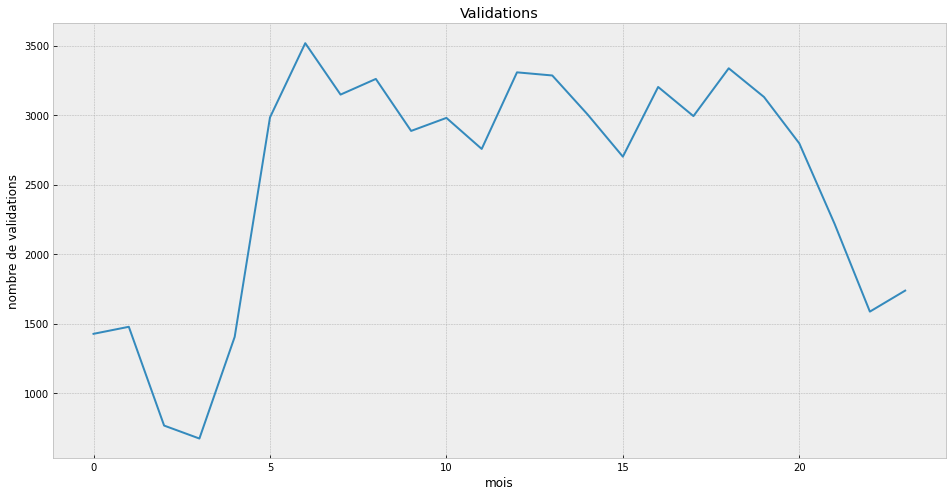

In [10]:
plt.figure(figsize=(16,8))
plt.title('Validations')
plt.xlabel('mois')
plt.ylabel('nombre de validations')
plt.plot(df['pourcentage_validations'])
plt.show()

In [11]:
df = df[['pourcentage_validations']]
df.head(5)

,pourcentage_validations
0,1426.47
1,1477.09
2,766.44
3,673.20
4,1404.57


In [12]:
future_days = 7
df['Prediction'] = df[['pourcentage_validations']].shift(-future_days)
df.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pourcentage_validations,Prediction
0,1426.47,3147.58
1,1477.09,3260.23
2,766.44,2886.19
3,673.20,2979.91


In [13]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[1426.47]
 [1477.09]
 [ 766.44]
 [ 673.2 ]
 [1404.57]
 [2983.05]
 [3517.4 ]
 [3147.58]
 [3260.23]
 [2886.19]
 [2979.91]
 [2756.62]
 [3307.65]
 [3285.08]
 [3004.92]
 [2701.04]
 [3202.47]]


In [14]:
y =np.array(df['Prediction'])[:-future_days]


In [15]:

print(y)


[3147.58 3260.23 2886.19 2979.91 2756.62 3307.65 3285.08 3004.92 2701.04
 3202.47 2992.82 3336.82 3130.22 2796.5  2217.65 1586.28 1737.42]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [17]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [18]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[2979.91],
       [2756.62],
       [3307.65],
       [3285.08],
       [3004.92],
       [2701.04],
       [3202.47]])

In [19]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2992.82 3336.82 2796.5  2796.5  2217.65 1586.28 1737.42]

[2645.97621776 2691.60828127 2578.99850942 2583.61096709 2640.86511601
 2702.96673928 2600.49333874]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


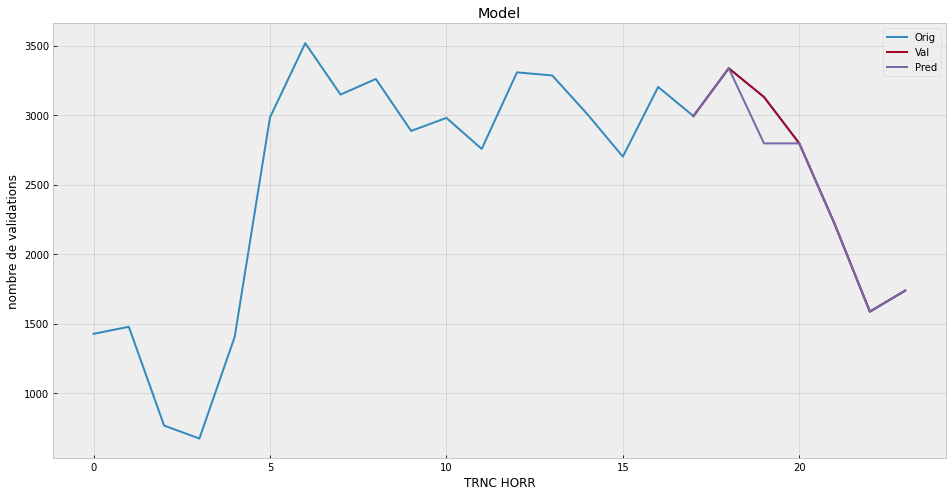

In [22]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('TRNC HORR')
plt.ylabel('nombre de validations')
plt.plot(df['pourcentage_validations'])
plt.plot(valid[['pourcentage_validations', 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


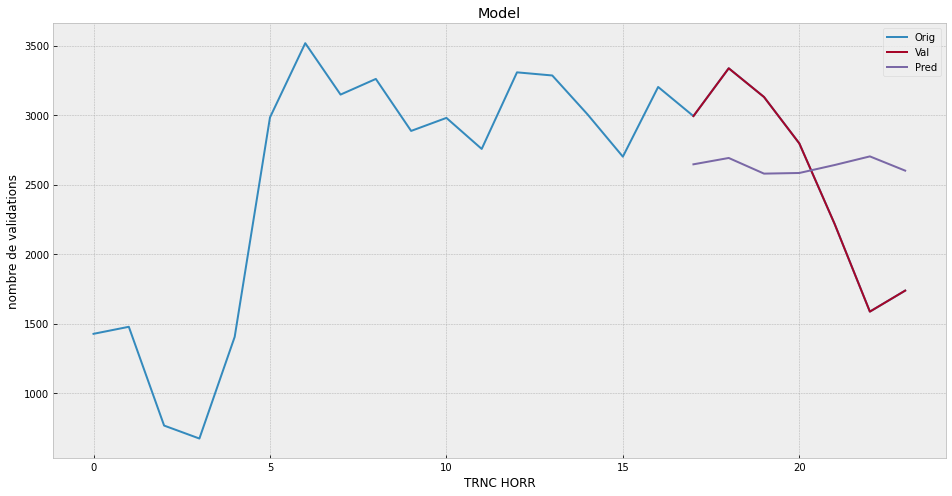

In [23]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('TRNC HORR')
plt.ylabel('nombre de validations')
plt.plot(df['pourcentage_validations'])
plt.plot(valid[['pourcentage_validations', 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()